# <div style="text-align:center">파이썬데이터분석 - 2차 과제 <br/><광주광역시_산불발생 현황></div>

<div style="text-align: right"> <b>ICT 공학부 202104137 김가을</b></div>
<div style="text-align: right"> <b>ICT 공학부 202104168 김준석</b></div>

# 1. 데이터 소개

공공데이터 포털에서 '광주광역시_산불발생 현황'이라는 데이터를 사용했습니다.
    
2011년부터 2022년까지 광주광역시에서 발생한 산불발생 현황 데이터입니다.
    
발생일자, 발화시간, 진화시간, 소요시간, 발생위치, 면적, 피해액, 발생원인,
    
진화참여인력, 진화장비 등의 내용을 제공하는 데이터입니다.
    
https://www.data.go.kr/data/15012197/fileData.do

# 2. 데이터 변경 및 선택 이유
    
처음에는 캐글에서 집값 예측 데이터를 사용했으나, 다른 조와 겹치는 주제에 너무 많은 
    
데이터 분석이 진행되어 있어 적절하지 않다고 판단하여 데이터를 변경하기로 했습니다.
    
매년 산불로 인한 많은 인명 피해와 금전적 피해가 따르고 있습니다.
    
데이터 분석을 하기에 적합한 산불관련 데이터가 광주광역시 이외에는 없어,
    
광주광역시의 산불발생 데이터를 사용하였으나, 이번 데이터 분석을 통한 학습을
    
더욱 확장하여 산불 예측까지의 학습을 기대하며 이를 전국 산불 발생 데이터에 적용시켜
    
전국적으로 산불 발생에 대한 예측을 통해 산불 예방에 도움이 되었으면 하는 바램으로
    
광주광역시 산불발생 현황 데이터 분석을 진행하게 되었습니다.

## 데이터 분석용 라이브러리

In [81]:
import pandas as pd
import numpy as np

## 데이터 불러오기

In [82]:
fire = pd.read_csv('C:/Users/가을님/python2023/project/gwangju_wildfire.csv', encoding = 'ANSI')
type(fire)

pandas.core.frame.DataFrame

## 데이터 확인하기

In [83]:
fire

,연번,발생일자,발생요일,발화시간,진화시간,소요시간,발생위치,면적(헥타르),수종,피해액(천원),...,소방인력,군인인력,기타인력,산악헬기,소방헬기,진화차,소방차,기타진화장비,비고,데이터기준일자
0,1,2011-03-29,화요일,15:06,16:50,1:44,광주광역시 서구 풍암동,0.500,활잡목,11469.0,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2022-10-07
1,2,2011-03-31,목요일,16:45,18:20,1:35,광주광역시 동구 지산동,0.200,"소나무, 참나무",5319.0,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2022-10-07
2,3,2012-03-28,수요일,16:15,19:00,2:45,광주광역시 동구 소태동,0.300,NaN,10592.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2022-10-07
3,4,2012-04-18,수요일,14:50,19:00,4:10,광주광역시 광산구 송학동,0.160,NaN,9619.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,등산객 부주의,2022-10-07
4,5,2013-02-17,일요일,6:53,8:30,1:37,광주광역시 동구 운림동 산238,0.300,"잡관목, 잡풀",NaN,...,20.0,NaN,NaN,1.0,2.0,2.0,2.0,140.0,무등산국립공원내(경찰수사의뢰),2022-10-07
5,6,2013-02-24,일요일,14:08,14:22,0:14,광주광역시 동구 운림동 390(광륵사 경내),0.003,잡풀,NaN,...,27.0,NaN,6.0,NaN,NaN,NaN,1.0,20.0,무등산국립공원,2022-10-07
6,7,2013-03-06,수요일,13:38,15:52,2:14,광주광역시 북구 장등동 산15-1,0.200,"리기다, 잡목",350.0,...,20.0,NaN,NaN,2.0,1.0,4.0,6.0,140.0,NaN,2022-10-07
7,8,2013-03-09,토요일,13:05,15:20,2:15,광주광역시 광산구 삼거동 산43,0.600,"소나무, 잡관목",400.0,...,20.0,NaN,NaN,1.0,1.0,2.0,7.0,400.0,NaN,2022-10-07
8,9,2013-03-09,토요일,13:22,14:15,0:53,광주광역시 북구 청풍동 704,0.050,"소나무, 잡목",350.0,...,20.0,NaN,30.0,1.0,1.0,4.0,3.0,600.0,NaN,2022-10-07
9,10,2013-04-03,수요일,13:50,14:30,0:40,광주광역시 광산구 대산동 산61,0.030,잡관목,NaN,...,10.0,NaN,NaN,1.0,1.0,2.0,4.0,60.0,NaN,2022-10-07


In [84]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연번       35 non-null     int64  
 1   발생일자     35 non-null     object 
 2   발생요일     35 non-null     object 
 3   발화시간     35 non-null     object 
 4   진화시간     35 non-null     object 
 5   소요시간     35 non-null     object 
 6   발생위치     35 non-null     object 
 7   면적(헥타르)  35 non-null     float64
 8   수종       30 non-null     object 
 9   피해액(천원)  8 non-null      float64
 10  발생원인     35 non-null     object 
 11  공무원인력    30 non-null     float64
 12  전문인력     27 non-null     float64
 13  공중인력     0 non-null      float64
 14  경찰인력     12 non-null     float64
 15  소방인력     29 non-null     float64
 16  군인인력     0 non-null      float64
 17  기타인력     8 non-null      float64
 18  산악헬기     23 non-null     float64
 19  소방헬기     20 non-null     float64
 20  진화차      28 non-null     float64
 21  소방차      29 non-nu

In [85]:
#열과 행
fire.shape

(35, 25)

In [86]:
#기술 통계량
fire.describe().T

,count,mean,std,min,25%,50%,75%,max
연번,35.0,18.000000,10.246951,1.000,9.50,18.00,26.50,35.0
면적(헥타르),35.0,0.139229,0.144410,0.003,0.03,0.08,0.20,0.6
피해액(천원),8.0,4810.750000,5070.271781,350.000,377.75,2859.50,9862.25,11469.0
공무원인력,30.0,53.300000,71.710698,1.000,8.25,26.50,55.00,300.0
전문인력,27.0,22.111111,10.867500,2.000,15.50,20.00,29.50,45.0
공중인력,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
경찰인력,12.0,7.250000,6.195673,2.000,4.50,5.50,8.50,25.0
소방인력,29.0,22.137931,10.595566,10.000,14.00,20.00,30.00,50.0
군인인력,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
기타인력,8.0,24.625000,20.472543,5.000,10.50,17.00,35.00,60.0


In [87]:
#문자열에 대한 통계
fire.describe(include=['object']).T

,count,unique,top,freq
발생일자,35,33,2014-02-23,2
발생요일,35,7,일요일,7
발화시간,35,34,15:05,2
진화시간,35,27,16:50,3
소요시간,35,29,1:00,4
발생위치,35,35,광주광역시 서구 풍암동,1
수종,30,18,잡관목,4
발생원인,35,16,논밭두렁 소각,7
비고,14,12,무등산국립공원,3
데이터기준일자,35,1,2022-10-07,35


# 열 이름 변경하기

In [88]:
fire.columns = ['num', 'date', 'day', 'start_time', 'end_time', 'use_time', 'location', 'damage_area(ha)', 
               'tree_speices', 'damage_money(1000won)', 'fire_cause', 'official', 'professional', 'public',
               'police', 'firefighting', 'military', 'other', 'mountainhelicopter', 'firehelicopter',
               'evolutioncar', 'firetruck', 'otherequipment', 'note', 'criteria_date']
fire.head()

,num,date,day,start_time,end_time,use_time,location,damage_area(ha),tree_speices,damage_money(1000won),...,firefighting,military,other,mountainhelicopter,firehelicopter,evolutioncar,firetruck,otherequipment,note,criteria_date
0,1,2011-03-29,화요일,15:06,16:50,1:44,광주광역시 서구 풍암동,0.50,활잡목,11469.0,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2022-10-07
1,2,2011-03-31,목요일,16:45,18:20,1:35,광주광역시 동구 지산동,0.20,"소나무, 참나무",5319.0,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2022-10-07
2,3,2012-03-28,수요일,16:15,19:00,2:45,광주광역시 동구 소태동,0.30,NaN,10592.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2022-10-07
3,4,2012-04-18,수요일,14:50,19:00,4:10,광주광역시 광산구 송학동,0.16,NaN,9619.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,등산객 부주의,2022-10-07
4,5,2013-02-17,일요일,6:53,8:30,1:37,광주광역시 동구 운림동 산238,0.30,"잡관목, 잡풀",NaN,...,20.0,NaN,NaN,1.0,2.0,2.0,2.0,140.0,무등산국립공원내(경찰수사의뢰),2022-10-07


# 결측치 NA 확인 및 채우기 

In [89]:
fire.isna().sum()

num                       0
date                      0
day                       0
start_time                0
end_time                  0
use_time                  0
location                  0
damage_area(ha)           0
tree_speices              5
damage_money(1000won)    27
fire_cause                0
official                  5
professional              8
public                   35
police                   23
firefighting              6
military                 35
other                    27
mountainhelicopter       12
firehelicopter           15
evolutioncar              7
firetruck                 6
otherequipment            5
note                     21
criteria_date             0
dtype: int64

In [90]:
fire.fillna(0, inplace=True)
fire.head()

,num,date,day,start_time,end_time,use_time,location,damage_area(ha),tree_speices,damage_money(1000won),...,firefighting,military,other,mountainhelicopter,firehelicopter,evolutioncar,firetruck,otherequipment,note,criteria_date
0,1,2011-03-29,화요일,15:06,16:50,1:44,광주광역시 서구 풍암동,0.50,활잡목,11469.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0,2022-10-07
1,2,2011-03-31,목요일,16:45,18:20,1:35,광주광역시 동구 지산동,0.20,"소나무, 참나무",5319.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0,2022-10-07
2,3,2012-03-28,수요일,16:15,19:00,2:45,광주광역시 동구 소태동,0.30,0,10592.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0,2022-10-07
3,4,2012-04-18,수요일,14:50,19:00,4:10,광주광역시 광산구 송학동,0.16,0,9619.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,등산객 부주의,2022-10-07
4,5,2013-02-17,일요일,6:53,8:30,1:37,광주광역시 동구 운림동 산238,0.30,"잡관목, 잡풀",0.0,...,20.0,0.0,0.0,1.0,2.0,2.0,2.0,140.0,무등산국립공원내(경찰수사의뢰),2022-10-07


# 총 동원 인력량, 총 동원 기계량 구하기 

In [91]:
fire['total_human'] = (fire.official +  fire.professional + fire.public
               + fire.police + fire.firefighting + fire.military + fire.other)
fire.total_human

0       0.0
1       0.0
2       0.0
3       0.0
4     100.0
5      42.0
6      80.0
7     190.0
8     370.0
9      80.0
10    300.0
11    290.0
12    200.0
13     58.0
14     37.0
15     69.0
16     73.0
17    149.0
18     65.0
19     50.0
20     95.0
21     48.0
22     19.0
23    125.0
24     80.0
25     60.0
26     50.0
27     45.0
28      0.0
29     58.0
30    182.0
31     66.0
32     48.0
33     59.0
34     34.0
Name: total_human, dtype: float64

In [92]:
fire['total_machine'] = (fire.mountainhelicopter + fire.firehelicopter +
               fire.evolutioncar + fire.firetruck + fire.otherequipment)
fire.total_machine

0       3.0
1       3.0
2       2.0
3       2.0
4     147.0
5      21.0
6     153.0
7     411.0
8     609.0
9      68.0
10    213.0
11    306.0
12    215.0
13     77.0
14     74.0
15    104.0
16    123.0
17    424.0
18     75.0
19     46.0
20    110.0
21     61.0
22     35.0
23     90.0
24     94.0
25     68.0
26     40.0
27      4.0
28      2.0
29     27.0
30     88.0
31     12.0
32      6.0
33     11.0
34     46.0
Name: total_machine, dtype: float64

# 필요하지 않은 열 삭제하기

In [93]:
#'num'열 삭제, 'official'열부터 'criteria_time'열까지 삭제
fire.drop(columns = 'num',  inplace=True)
fire.drop(fire.columns[fire.columns.get_loc('official'):fire.columns.get_loc('criteria_date')+1], axis=1, inplace=True)
fire.head()

,date,day,start_time,end_time,use_time,location,damage_area(ha),tree_speices,damage_money(1000won),fire_cause,total_human,total_machine
0,2011-03-29,화요일,15:06,16:50,1:44,광주광역시 서구 풍암동,0.50,활잡목,11469.0,논밭두렁 소각,0.0,3.0
1,2011-03-31,목요일,16:45,18:20,1:35,광주광역시 동구 지산동,0.20,"소나무, 참나무",5319.0,입산자 실화,0.0,3.0
2,2012-03-28,수요일,16:15,19:00,2:45,광주광역시 동구 소태동,0.30,0,10592.0,논밭두렁 소각,0.0,2.0
3,2012-04-18,수요일,14:50,19:00,4:10,광주광역시 광산구 송학동,0.16,0,9619.0,입산자 실화,0.0,2.0
4,2013-02-17,일요일,6:53,8:30,1:37,광주광역시 동구 운림동 산238,0.30,"잡관목, 잡풀",0.0,원인미상,100.0,147.0


# 몇몇 열의 단위 변환 및 수정하기

In [94]:
#문자형 소요시간 데이터를 정수형태, 분단위로 변경
fire['use_time(min)'] = fire['use_time'].str.replace(':', '')
fire['use_time(min)'] = fire['use_time(min)'].astype(np.int64)
fire['use_time(min)']  = (fire['use_time(min)'] // 100 * 60) + fire['use_time(min)'] % 100
fire.head()

,date,day,start_time,end_time,use_time,location,damage_area(ha),tree_speices,damage_money(1000won),fire_cause,total_human,total_machine,use_time(min)
0,2011-03-29,화요일,15:06,16:50,1:44,광주광역시 서구 풍암동,0.50,활잡목,11469.0,논밭두렁 소각,0.0,3.0,104
1,2011-03-31,목요일,16:45,18:20,1:35,광주광역시 동구 지산동,0.20,"소나무, 참나무",5319.0,입산자 실화,0.0,3.0,95
2,2012-03-28,수요일,16:15,19:00,2:45,광주광역시 동구 소태동,0.30,0,10592.0,논밭두렁 소각,0.0,2.0,165
3,2012-04-18,수요일,14:50,19:00,4:10,광주광역시 광산구 송학동,0.16,0,9619.0,입산자 실화,0.0,2.0,250
4,2013-02-17,일요일,6:53,8:30,1:37,광주광역시 동구 운림동 산238,0.30,"잡관목, 잡풀",0.0,원인미상,100.0,147.0,97


In [95]:
#헥타르 단위의 피해면적을 보기 쉽게 제곱미터 단위로 변경
fire['damage_area(m^2)'] = fire['damage_area(ha)'] * 10000
fire.head()

,date,day,start_time,end_time,use_time,location,damage_area(ha),tree_speices,damage_money(1000won),fire_cause,total_human,total_machine,use_time(min),damage_area(m^2)
0,2011-03-29,화요일,15:06,16:50,1:44,광주광역시 서구 풍암동,0.50,활잡목,11469.0,논밭두렁 소각,0.0,3.0,104,5000.0
1,2011-03-31,목요일,16:45,18:20,1:35,광주광역시 동구 지산동,0.20,"소나무, 참나무",5319.0,입산자 실화,0.0,3.0,95,2000.0
2,2012-03-28,수요일,16:15,19:00,2:45,광주광역시 동구 소태동,0.30,0,10592.0,논밭두렁 소각,0.0,2.0,165,3000.0
3,2012-04-18,수요일,14:50,19:00,4:10,광주광역시 광산구 송학동,0.16,0,9619.0,입산자 실화,0.0,2.0,250,1600.0
4,2013-02-17,일요일,6:53,8:30,1:37,광주광역시 동구 운림동 산238,0.30,"잡관목, 잡풀",0.0,원인미상,100.0,147.0,97,3000.0


In [96]:
#발생일자 데이터에서 '월'정보만 추출
fire['month'] = pd.to_datetime(fire['date']).dt.month
fire.head()

,date,day,start_time,end_time,use_time,location,damage_area(ha),tree_speices,damage_money(1000won),fire_cause,total_human,total_machine,use_time(min),damage_area(m^2),month
0,2011-03-29,화요일,15:06,16:50,1:44,광주광역시 서구 풍암동,0.50,활잡목,11469.0,논밭두렁 소각,0.0,3.0,104,5000.0,3
1,2011-03-31,목요일,16:45,18:20,1:35,광주광역시 동구 지산동,0.20,"소나무, 참나무",5319.0,입산자 실화,0.0,3.0,95,2000.0,3
2,2012-03-28,수요일,16:15,19:00,2:45,광주광역시 동구 소태동,0.30,0,10592.0,논밭두렁 소각,0.0,2.0,165,3000.0,3
3,2012-04-18,수요일,14:50,19:00,4:10,광주광역시 광산구 송학동,0.16,0,9619.0,입산자 실화,0.0,2.0,250,1600.0,4
4,2013-02-17,일요일,6:53,8:30,1:37,광주광역시 동구 운림동 산238,0.30,"잡관목, 잡풀",0.0,원인미상,100.0,147.0,97,3000.0,2


In [97]:
#광주광역시 데이터이므로 'location'열에 중복되는 '광주광역시'를 삭제함으로써 축약
fire['location'] = fire['location'].str.replace('광주광역시 ', '')
fire.head()

,date,day,start_time,end_time,use_time,location,damage_area(ha),tree_speices,damage_money(1000won),fire_cause,total_human,total_machine,use_time(min),damage_area(m^2),month
0,2011-03-29,화요일,15:06,16:50,1:44,서구 풍암동,0.50,활잡목,11469.0,논밭두렁 소각,0.0,3.0,104,5000.0,3
1,2011-03-31,목요일,16:45,18:20,1:35,동구 지산동,0.20,"소나무, 참나무",5319.0,입산자 실화,0.0,3.0,95,2000.0,3
2,2012-03-28,수요일,16:15,19:00,2:45,동구 소태동,0.30,0,10592.0,논밭두렁 소각,0.0,2.0,165,3000.0,3
3,2012-04-18,수요일,14:50,19:00,4:10,광산구 송학동,0.16,0,9619.0,입산자 실화,0.0,2.0,250,1600.0,4
4,2013-02-17,일요일,6:53,8:30,1:37,동구 운림동 산238,0.30,"잡관목, 잡풀",0.0,원인미상,100.0,147.0,97,3000.0,2


# 필요하지 않은 열 삭제하기

In [98]:
#'use_time'열 삭제, 'damage_area(ha)'열 삭제
fire.drop(columns = 'use_time', inplace=True)
fire.drop(columns = 'damage_area(ha)', inplace=True)
fire.head()

,date,day,start_time,end_time,location,tree_speices,damage_money(1000won),fire_cause,total_human,total_machine,use_time(min),damage_area(m^2),month
0,2011-03-29,화요일,15:06,16:50,서구 풍암동,활잡목,11469.0,논밭두렁 소각,0.0,3.0,104,5000.0,3
1,2011-03-31,목요일,16:45,18:20,동구 지산동,"소나무, 참나무",5319.0,입산자 실화,0.0,3.0,95,2000.0,3
2,2012-03-28,수요일,16:15,19:00,동구 소태동,0,10592.0,논밭두렁 소각,0.0,2.0,165,3000.0,3
3,2012-04-18,수요일,14:50,19:00,광산구 송학동,0,9619.0,입산자 실화,0.0,2.0,250,1600.0,4
4,2013-02-17,일요일,6:53,8:30,동구 운림동 산238,"잡관목, 잡풀",0.0,원인미상,100.0,147.0,97,3000.0,2


# 데이터 시각화하기

## 2011년 ~ 2022년 광주광역시 연도별 산불 발생 횟수 & 총 피해 면적

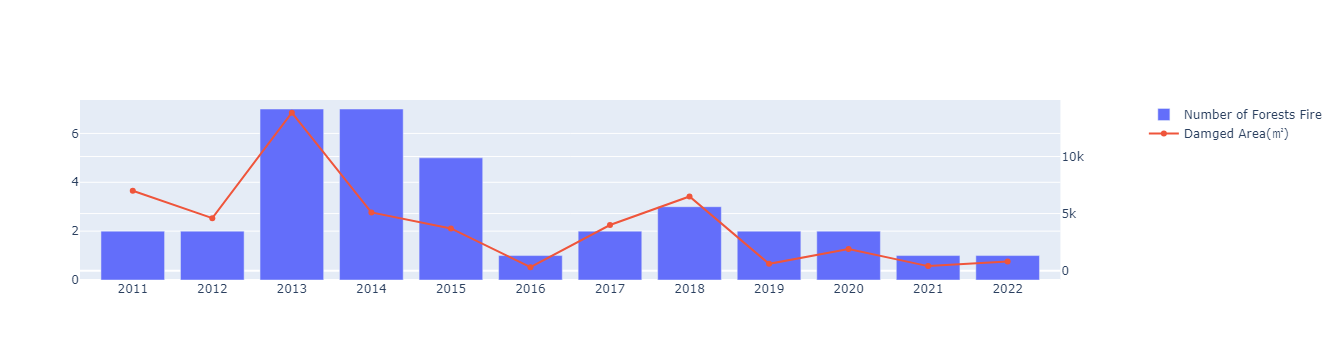

In [130]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fire['startyear'] = pd.to_datetime(fire['date']).dt.year

year_count=pd.DataFrame(fire.groupby(['startyear']).count()['fire_cause'])
year_count.columns=['firecounts']
fire['damage_area(m^2)']=fire['damage_area(m^2)'].astype(float)

year_sum=pd.DataFrame(fire.groupby(['startyear']).sum()['damage_area(m^2)'])

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=year_count.index, y=year_count['firecounts'], name="Number of Forests Fire"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=year_count.index, y=year_sum['damage_area(m^2)'], name="Damged Area(㎡)"),
    secondary_y=True,
)

fig.update_layout(xaxis=dict(tickmode='linear'))

fig.show()

2013년 대비해서는 22년 산불 횟수나 피해 면적 모두 감소했고, 2013년 대비 산불 횟수는 약 0.14배, 피해 면적은 약 약 0.05배 가까이 감소했다.

## 2011년 ~ 2022년 광주광역시 월별 산불 발생 횟수 & 총 피해 면적

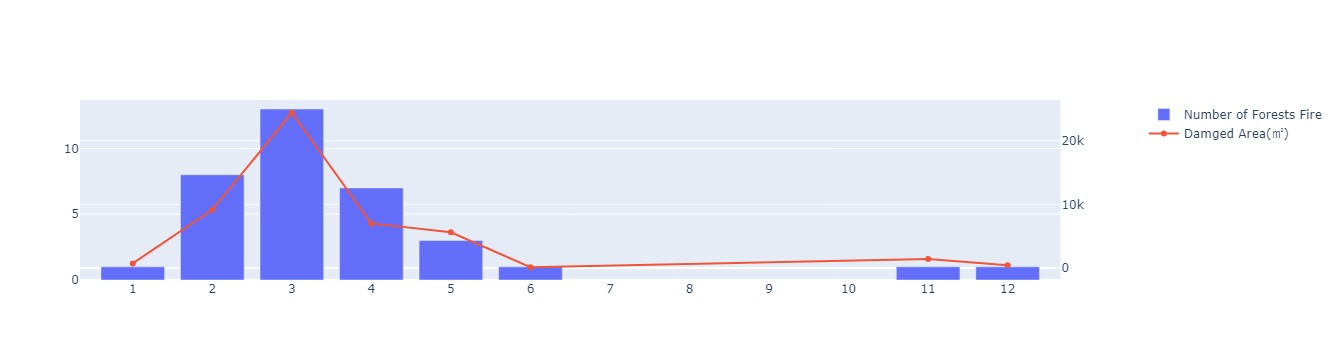

In [128]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

month_count=pd.DataFrame(fire.groupby(['month']).count()['fire_cause'])
month_count.columns=['firecounts']
fire['damage_area(m^2)']=fire['damage_area(m^2)'].astype(float)

month_sum=pd.DataFrame(fire.groupby(['month']).sum()['damage_area(m^2)'])

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=month_count.index, y=month_count['firecounts'], name="Number of Forests Fire"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=month_count.index, y=month_sum['damage_area(m^2)'], name="Damged Area(㎡)"),
    secondary_y=True,
)

fig.update_layout(xaxis=dict(tickmode='linear'))

fig.show()

봄이 시작되는 3월에 총 24400㎡의 피해 면적이 나타나고, 13회의 산불 발생 횟수가 나타나지만 여름인 7~10월에는 산불이 발생하지 않는다.

# 데이터 딕셔너리 (data dictionary)

In [99]:
column_names = {'column_name': ['date', 'day', 'start_time', 'end_time', 'location', 'tree_speices', 'damage_money(1000won)', 'fire_cause',
                            'total_human', 'total_machine', 'use_time(min)', 'damage_area(m^2)', 'month'],
             'description': ['발생일자', '발생요일', '발화시간', '진화시간', '발생위치', '수종', '피해액(천원)', '발생원인',
                            '총 동원 인력량', '총 동원 기계량', '소요시간(분)', '면적(m^2)', '발생일자(월)']}

# 데이터프레임 생성
col_names = pd.DataFrame(column_names)
col_names


,column_name,description
0,date,발생일자
1,day,발생요일
2,start_time,발화시간
3,end_time,진화시간
4,location,발생위치
5,tree_speices,수종
6,damage_money(1000won),피해액(천원)
7,fire_cause,발생원인
8,total_human,총 동원 인력량
9,total_machine,총 동원 기계량


# 분석할 컬럼만 추출

In [101]:
#월별 소요시간 및 피해 면적과 발생원인에 대한 상관관계 분석
cols=[
    'month',
    'use_time(min)',
    'fire_cause',
    'damage_area(m^2)'
]

col2 = fire.loc[:, cols]
col2

,month,use_time(min),fire_cause,damage_area(m^2)
0,3,104,논밭두렁 소각,5000.0
1,3,95,입산자 실화,2000.0
2,3,165,논밭두렁 소각,3000.0
3,4,250,입산자 실화,1600.0
4,2,97,원인미상,3000.0
5,2,14,쓰레기 소각,30.0
6,3,134,농산폐기물 소각,2000.0
7,3,135,묘지 소각,6000.0
8,3,53,논밭두렁 소각,500.0
9,4,40,논밭두렁 소각,300.0


변수들의 상관관계를 분석하기 위해서 문자열인 fire_cause열을 숫자형으로 변환한다.

In [102]:
col2['fire_cause_num'] = pd.Categorical(col2['fire_cause']).codes

col2

,month,use_time(min),fire_cause,damage_area(m^2),fire_cause_num
0,3,104,논밭두렁 소각,5000.0,0
1,3,95,입산자 실화,2000.0,13
2,3,165,논밭두렁 소각,3000.0,0
3,4,250,입산자 실화,1600.0,13
4,2,97,원인미상,3000.0,12
5,2,14,쓰레기 소각,30.0,10
6,3,134,농산폐기물 소각,2000.0,3
7,3,135,묘지 소각,6000.0,6
8,3,53,논밭두렁 소각,500.0,0
9,4,40,논밭두렁 소각,300.0,0


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵을 이용해 변수들간 상관계수 계산

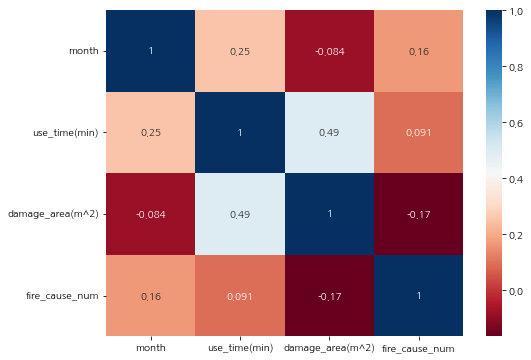

In [105]:
# 상관계수 계산
correlation = col2.corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='RdBu')
plt.show()

month와 use_time(min)은 상관 계수 0.25로 양의 상관 관계를 나타내며 이는 month가 증가할수록 use_time이 약간 증가하는 경향이 있음을 나타낸다.

month와 damage_area(m^2)은 상관 계수가 -0.084로 약한 음의 상관 관계를 보인다. 이는 month가 증가할수록 damage_area(m^2)은 약간 감소하는 것을 나타낸다.

use_time(min)과 damage_area(m^2)는 상관 계수 0.49로 강한 양의 상관 관계를 나타내며 이는 use_time(min)이 증가할수록 damage_area(m^2)도 크게 증가하는 것이다.

fire_cause변수는 모든 변수에 대해 약한 상관 관계를 띄고 있다.

# 월별에 따른 총 피해 면적

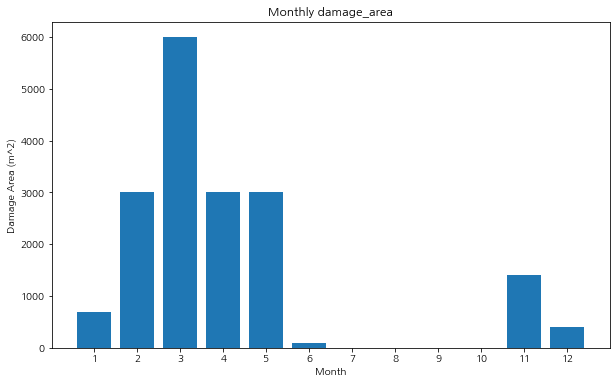

In [109]:
plt.figure(figsize=(10, 6))
plt.bar(col2['month'], col2['damage_area(m^2)'])
plt.xlabel('Month')
plt.ylabel('Damage Area (㎡)')
plt.title('Monthly damage_area')
plt.xticks(range(min(col2['month']), max(col2['month']+1), 1)) # x축 데이터의 범위
plt.show()

월별에 따른 피해 면적의 변화량을 나타내는 그래프이다.
위 그래프를 통해 3월에 산불의 피해 면적이 가장 크고, 7월에서 10월의 피해는 없는 것을 확인할 수 있다.

# 소요시간(분)과 피해 면적의 상관계수 산포도

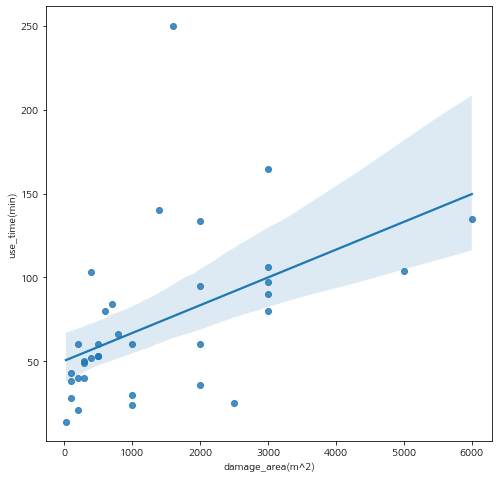

In [110]:
x = col2['damage_are(m^2)']
y = col2['use_time(min)']


# 산포도 그래프 그리기
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x, y, alpha=.1)
sns.regplot(x=x, y=y, data=col2)
plt.show()

use_time(min)과 damage_area(m^2)의 상관계수를 산포도로 나타냈을 때, 이상치가 많이 나타나는 것을 알 수 있음

# 분석할 컬럼만 추출

In [111]:
#위치와 피해 면적, 금액에 대한 상관관계 분석
cols=[
    'location',
    'damage_area(m^2)',
    'damage_money(1000won)'
]

col3 = fire.loc[:, cols]
col3

,location,damage_area(m^2),damage_money(1000won)
0,서구 풍암동,5000.0,11469.0
1,동구 지산동,2000.0,5319.0
2,동구 소태동,3000.0,10592.0
3,광산구 송학동,1600.0,9619.0
4,동구 운림동 산238,3000.0,0.0
5,동구 운림동 390(광륵사 경내),30.0,0.0
6,북구 장등동 산15-1,2000.0,350.0
7,광산구 삼거동 산43,6000.0,400.0
8,북구 청풍동 704,500.0,350.0
9,광산구 대산동 산61,300.0,0.0


In [112]:
# location열에서 자치구를 제외한 문자열 삭제
col3['location'] = col3['location'].str.replace(' .*$', '', regex=True)
col3['location_num'] = pd.Categorical(col3['location']).codes
col3

,location,damage_area(m^2),damage_money(1000won),location_num
0,서구,5000.0,11469.0,4
1,동구,2000.0,5319.0,2
2,동구,3000.0,10592.0,2
3,광산구,1600.0,9619.0,0
4,동구,3000.0,0.0,2
5,동구,30.0,0.0,2
6,북구,2000.0,350.0,3
7,광산구,6000.0,400.0,0
8,북구,500.0,350.0,3
9,광산구,300.0,0.0,0


# 지역(자치구) 별 총 피해 면적

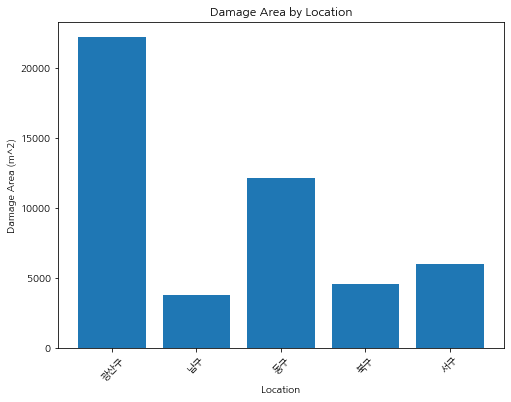

In [113]:
# location별 피해면적 계산
area_by_location = col3.groupby('location')['damage_area(m^2)'].sum()

# 막대그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(area_by_location.index, area_by_location.values)
plt.xlabel('Location')
plt.ylabel('Damage Area (m^2)')
plt.title('Damage Area by Location')
plt.xticks(rotation=45)
plt.rcParams['font.family'] = 'NanumGothic'

plt.show()


광산구의 산불 피해 면적이 가장 크고, 남구의 산불 피해 면적이 가장 작으며, 광산구의 피해 면적은 남구의 피해 면적보다 4배 이상 크다.

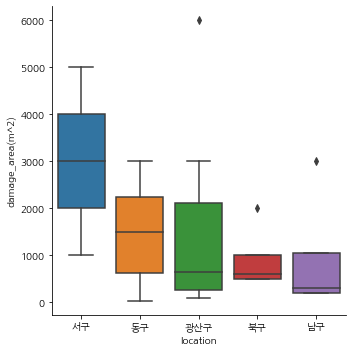

In [115]:
sns.catplot(x='location', y='damage_area(m^2)', data=col3, kind='box')

plt.show()

위의 그래프는 데이터의 분포가 상당히 넓으며 이상치가 존재함을 나타낸다. 데이터가 박스 범위에 집중되어 있지만 일부 데이터가 이 범위를 벗어나는 것을 알 수 있다.

# 히트맵을 이용해 변수들간 상관계수 계산

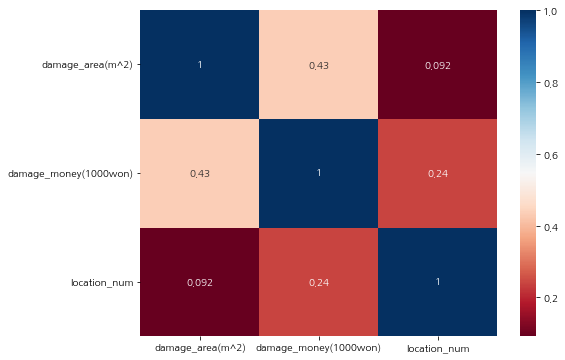

In [116]:
# 상관 계수 계산
correlation = col3.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='RdBu')

plt.show()

피해 금액과 피해 면적의 상관 계수가 0.43으로 두 변수 사이에 어느 정도의 양의 선형 관계가 있음을 의미한다. 

# 피해 금액(1000원)과 피해 면적의 산포도

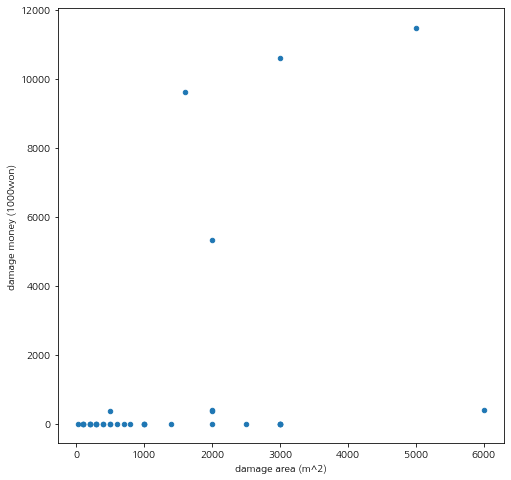

In [117]:
fig, ax = plt.subplots(figsize=(8, 8))
col3.plot.scatter(
    x='damage_area(m^2)',
    y='damage_money(1000won)',
    
    ax=ax
)

plt.xlabel('damage area (m^2)')
plt.ylabel('damage money (1000won)')
plt.show()

damage_money(1000won)데이터에 입력되지 않은 값이 많아 산포도를 통한 파악이 어렵다.

# 분석할 컬럼만 추출

In [118]:
#피해 면적, 금액에 대해 필요한 인력량, 기계량, 소요시간 상관관계 분석
cols=[
    'damage_area(m^2)',
    'damage_money(1000won)',
    'total_human',
    'total_machine',
    'use_time(min)'
]

col4 = fire.loc[:, cols]
col4

,damage_area(m^2),damage_money(1000won),total_human,total_machine,use_time(min)
0,5000.0,11469.0,0.0,3.0,104
1,2000.0,5319.0,0.0,3.0,95
2,3000.0,10592.0,0.0,2.0,165
3,1600.0,9619.0,0.0,2.0,250
4,3000.0,0.0,100.0,147.0,97
5,30.0,0.0,42.0,21.0,14
6,2000.0,350.0,80.0,153.0,134
7,6000.0,400.0,190.0,411.0,135
8,500.0,350.0,370.0,609.0,53
9,300.0,0.0,80.0,68.0,40


# 히트맵을 이용해 변수들간 상관계수 계산

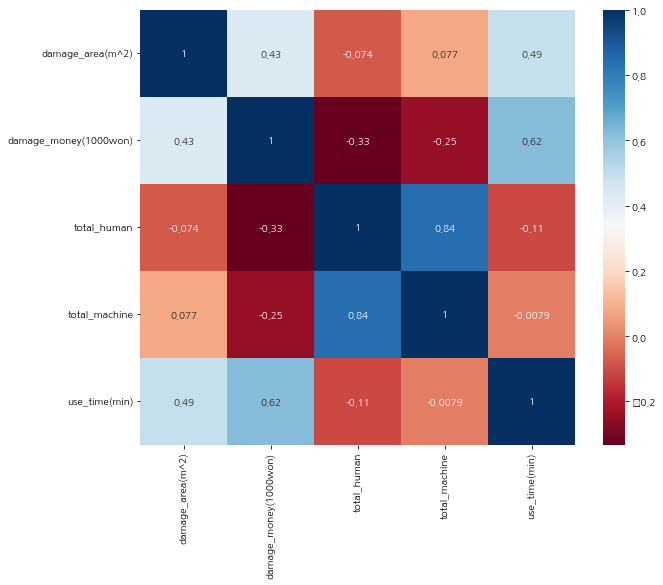

In [120]:
correlation_matrix = col4.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', square=True, ax=ax)

plt.show()

total_human과 total_machine의 데이터가 강한 양의 상관관계를 띄고 있으며, 그 다음으로 damage_money(1000won)와 use_time(min)의 데이터가 양의 상관관계를 띄고 있다.

# 총 동원 인력량과 총 동원 기계량의 산포도

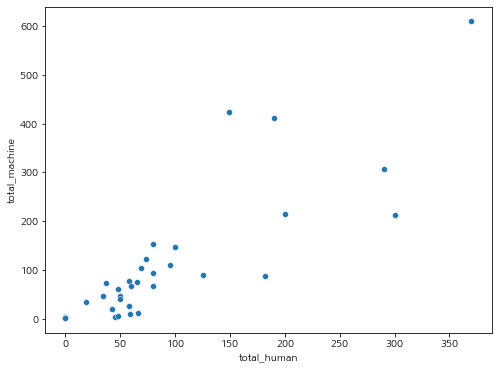

In [121]:
# 인력과 기계량 변수의 시각화
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=col4, x='total_human', y='total_machine')

plt.show()

총 동원 인력량이 증가할수록 총 동원 기계량도 따라서 증가하는 경향이 있다.

# 피해 그램(1000원)과 소요시간(분)의 산포도

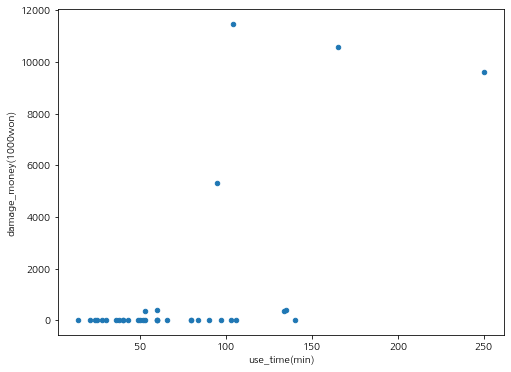

In [122]:
fig, ax = plt.subplots(figsize=(8, 6))
col4.plot.scatter(
    x='use_time(min)',
    y='damage_money(1000won)',
    ax=ax
)

plt.show()

피해 금액의 데이터에 0값이 많아 산포도를 통한 상관관계 확인이 어렵다.

# 소요시간(분)과 총 동원 인력량의 산포도

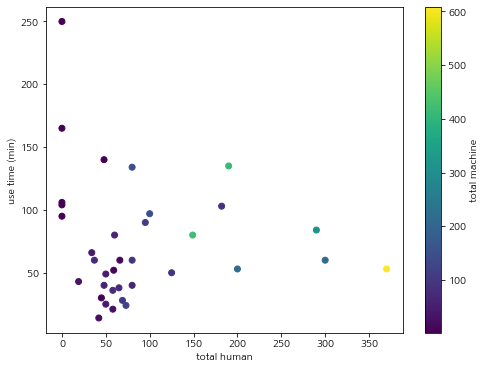

In [126]:
total_human = col4['total_human']
total_machine = col4['total_machine']
use_time = col4['use_time(min)']

# 시각화
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(total_human, use_time, c=total_machine, cmap='viridis')

# 색상 범례
cbar = plt.colorbar(scatter)
cbar.set_label('total machine')

ax.set_xlabel('total human')
ax.set_ylabel('use time (min)')

plt.show()


총 동원 인력이 증가할수록 화재 소요 시간이 감소하는 경향을 약하게 띈다. 마찬가지로 총 동원 기계량이 증가할수록 화재 소요 시간이 감소하는 경향을 미미하게 보인다.

### 2013년 대비해서는 22년 산불 횟수나 피해 면적 모두 감소했고, 2013년 대비 산불 횟수는 약 0.14배, 피해 면적은 약 약 0.05배 가까이 감소했다.
### 봄이 시작되는 3월에 총 24400㎡의 피해 면적이 나타나고, 13회의 산불 발생 횟수가 나타나지만 여름인 7~10월에는 산불이 발생하지 않는다.
### 화재를 진압하기 위한 총 동원 인력량이 증가할수록 총 동원 기계량도 따라서 증가한다.
### 총 동원 인력량이 증가할수록 화재 진압에 소요되는 시간이 감소하는 경향이 약하게 나타나며, 이는 총 동원 기계량이 증가할수록 화재 진압에 소요되는 시간이 감소하는 경향이 약하게 나타난다고 할 수가 있다.
### 피해 금액에 대한 데이터가 적어 피해 금액으로 데이터 분석을 하기에는 어려움이 있다.


### 추후에 피해 금액에 대한 데이터만 충분하다면 이를 이용해 데이터 분석을 하면 경제적 측면으로도 분석을 할수 있다는 장점이 생길 것이다.